In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



In [25]:
rng = pd.date_range('1/1/2011', periods=24, freq='15min')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 00:15:00',
               '2011-01-01 00:30:00', '2011-01-01 00:45:00',
               '2011-01-01 01:00:00', '2011-01-01 01:15:00',
               '2011-01-01 01:30:00', '2011-01-01 01:45:00',
               '2011-01-01 02:00:00', '2011-01-01 02:15:00',
               '2011-01-01 02:30:00', '2011-01-01 02:45:00',
               '2011-01-01 03:00:00', '2011-01-01 03:15:00',
               '2011-01-01 03:30:00', '2011-01-01 03:45:00',
               '2011-01-01 04:00:00', '2011-01-01 04:15:00',
               '2011-01-01 04:30:00', '2011-01-01 04:45:00',
               '2011-01-01 05:00:00', '2011-01-01 05:15:00',
               '2011-01-01 05:30:00', '2011-01-01 05:45:00'],
              dtype='datetime64[ns]', freq='15T')

In [190]:
rng[3]

Timestamp('2016-02-01 00:45:00', freq='15T')

### Generate Random Time Vector



In [39]:
import random
N = 20
rng = pd.date_range('1/1/2011', periods=N, freq='15min')

tmp = []
for i in range(round(N/2)):
    k = random.randint(0,N-1)
    tmp.append(rng[k])

X = pd.Series(tmp)
print(X)

0   2011-01-01 02:00:00
1   2011-01-01 04:30:00
2   2011-01-01 01:15:00
3   2011-01-01 03:15:00
4   2011-01-01 02:15:00
5   2011-01-01 00:15:00
6   2011-01-01 03:30:00
7   2011-01-01 01:00:00
8   2011-01-01 01:30:00
9   2011-01-01 01:15:00
dtype: datetime64[ns]


In [41]:
M = len(X)
Y = np.zeros(M)
Y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [76]:

X_=X.sort_values()
ind=pd.DatetimeIndex(X_.values)
ind

DatetimeIndex(['2011-01-01 00:15:00', '2011-01-01 01:00:00',
               '2011-01-01 01:15:00', '2011-01-01 01:15:00',
               '2011-01-01 01:30:00', '2011-01-01 02:00:00',
               '2011-01-01 02:15:00', '2011-01-01 03:15:00',
               '2011-01-01 03:30:00', '2011-01-01 04:30:00'],
              dtype='datetime64[ns]', freq=None)

In [122]:
car1 = pd.Series(0, index=ind)
car1

2011-01-01 00:15:00    0
2011-01-01 01:00:00    0
2011-01-01 01:15:00    0
2011-01-01 01:15:00    0
2011-01-01 01:30:00    0
2011-01-01 02:00:00    0
2011-01-01 02:15:00    0
2011-01-01 03:15:00    0
2011-01-01 03:30:00    0
2011-01-01 04:30:00    0
dtype: int64

### Merge two time Series

In [98]:
rng = pd.date_range('1/1/2011', periods=24, freq='15min')
rng
runvalue = pd.Series(1, index=rng)
runvalue

2011-01-01 00:00:00    1
2011-01-01 00:15:00    1
2011-01-01 00:30:00    1
2011-01-01 00:45:00    1
2011-01-01 01:00:00    1
2011-01-01 01:15:00    1
2011-01-01 01:30:00    1
2011-01-01 01:45:00    1
2011-01-01 02:00:00    1
2011-01-01 02:15:00    1
2011-01-01 02:30:00    1
2011-01-01 02:45:00    1
2011-01-01 03:00:00    1
2011-01-01 03:15:00    1
2011-01-01 03:30:00    1
2011-01-01 03:45:00    1
2011-01-01 04:00:00    1
2011-01-01 04:15:00    1
2011-01-01 04:30:00    1
2011-01-01 04:45:00    1
2011-01-01 05:00:00    1
2011-01-01 05:15:00    1
2011-01-01 05:30:00    1
2011-01-01 05:45:00    1
Freq: 15T, dtype: int64

In [137]:
#check dublicated index


car1.index.duplicated()

array([False, False, False,  True, False, False, False, False, False, False], dtype=bool)

In [140]:
### Remove dublicated

car1_corr =  car1[~car1.index.duplicated()]
car1_corr

2011-01-01 00:15:00    0
2011-01-01 01:00:00    0
2011-01-01 01:15:00    0
2011-01-01 01:30:00    0
2011-01-01 02:00:00    0
2011-01-01 02:15:00    0
2011-01-01 03:15:00    0
2011-01-01 03:30:00    0
2011-01-01 04:30:00    0
dtype: int64

In [142]:
car1_corr.reindex(rng)

2011-01-01 00:00:00    NaN
2011-01-01 00:15:00    0.0
2011-01-01 00:30:00    NaN
2011-01-01 00:45:00    NaN
2011-01-01 01:00:00    0.0
2011-01-01 01:15:00    0.0
2011-01-01 01:30:00    0.0
2011-01-01 01:45:00    NaN
2011-01-01 02:00:00    0.0
2011-01-01 02:15:00    0.0
2011-01-01 02:30:00    NaN
2011-01-01 02:45:00    NaN
2011-01-01 03:00:00    NaN
2011-01-01 03:15:00    0.0
2011-01-01 03:30:00    0.0
2011-01-01 03:45:00    NaN
2011-01-01 04:00:00    NaN
2011-01-01 04:15:00    NaN
2011-01-01 04:30:00    0.0
2011-01-01 04:45:00    NaN
2011-01-01 05:00:00    NaN
2011-01-01 05:15:00    NaN
2011-01-01 05:30:00    NaN
2011-01-01 05:45:00    NaN
Freq: 15T, dtype: float64

In [138]:
# give NaN a new value 1

2011-01-01 00:15:00    0
2011-01-01 01:00:00    0
2011-01-01 01:15:00    0
2011-01-01 01:30:00    0
2011-01-01 02:00:00    0
2011-01-01 02:15:00    0
2011-01-01 03:15:00    0
2011-01-01 03:30:00    0
2011-01-01 04:30:00    0
dtype: int64

In [143]:
# measure length of 1

## Working with DataFrame

In [49]:
df=pd.DataFrame({"time":X,"val":Y})
df

,time,val
0,2011-01-01 02:00:00,0.0
1,2011-01-01 04:30:00,0.0
2,2011-01-01 01:15:00,0.0
3,2011-01-01 03:15:00,0.0
4,2011-01-01 02:15:00,0.0
5,2011-01-01 00:15:00,0.0
6,2011-01-01 03:30:00,0.0
7,2011-01-01 01:00:00,0.0
8,2011-01-01 01:30:00,0.0
9,2011-01-01 01:15:00,0.0


## Dataset with time and a constant Value

In [51]:
df['date_int'] = df.time.astype(np.int64)
df

,time,val,date_int
0,2011-01-01 02:00:00,0.0,1293847200000000000
1,2011-01-01 04:30:00,0.0,1293856200000000000
2,2011-01-01 01:15:00,0.0,1293844500000000000
3,2011-01-01 03:15:00,0.0,1293851700000000000
4,2011-01-01 02:15:00,0.0,1293848100000000000
5,2011-01-01 00:15:00,0.0,1293840900000000000
6,2011-01-01 03:30:00,0.0,1293852600000000000
7,2011-01-01 01:00:00,0.0,1293843600000000000
8,2011-01-01 01:30:00,0.0,1293845400000000000
9,2011-01-01 01:15:00,0.0,1293844500000000000


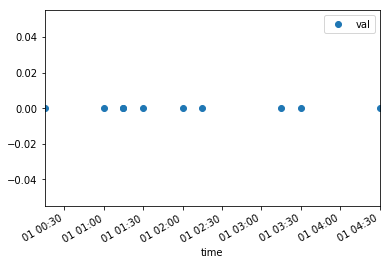

In [57]:
df.plot(x='time',y='val',style='o')

### Calculate Space between  the data

In [65]:
#df.sort(columns=['time'])

result = df.sort(['time'], ascending=True)
result

/Users/guggisberg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,time,val,date_int
5,2011-01-01 00:15:00,0.0,1293840900000000000
7,2011-01-01 01:00:00,0.0,1293843600000000000
2,2011-01-01 01:15:00,0.0,1293844500000000000
9,2011-01-01 01:15:00,0.0,1293844500000000000
8,2011-01-01 01:30:00,0.0,1293845400000000000
0,2011-01-01 02:00:00,0.0,1293847200000000000
4,2011-01-01 02:15:00,0.0,1293848100000000000
3,2011-01-01 03:15:00,0.0,1293851700000000000
6,2011-01-01 03:30:00,0.0,1293852600000000000
1,2011-01-01 04:30:00,0.0,1293856200000000000


## Playing with the Time 
- generate a 14 months Series 
- read in the date monthly in an array
- filter and recalibrate the input
- store the data in a pandas format  (e.g. netxblabla)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## generate Data from 1.2.2016 to 3.4.2017


In [27]:
start = '2/1/2016'
end = '2/2/2016'

rng = pd.date_range(start,end , freq='15min')
#rng

## fuzzy the generated time

In [78]:
tfuzzy = []
for ts in rng:
    rmin = np.random.randint(0,1)
    rmin = 0
    rsec = np.random.randint(0,4)
    #rsec = 0
    tstr = str(rmin)+'m'+str(rsec)+'s'
    nt=ts+pd.Timedelta(tstr)
    # loose 10%
    if np.random.random() < 0.7:
        tfuzzy.append(nt)

#tfuzzy

In [79]:
Tseq = pd.Series(1,tfuzzy)
#Tseq

## bring it together

In [87]:
tol = pd.Timedelta('15m0s')

Tseq.reindex(rng,method='ffill',tolerance=tol)

2016-02-01 00:00:00    NaN
2016-02-01 00:15:00    NaN
2016-02-01 00:30:00    1.0
2016-02-01 00:45:00    1.0
2016-02-01 01:00:00    1.0
2016-02-01 01:15:00    1.0
2016-02-01 01:30:00    1.0
2016-02-01 01:45:00    NaN
2016-02-01 02:00:00    1.0
2016-02-01 02:15:00    NaN
2016-02-01 02:30:00    1.0
2016-02-01 02:45:00    1.0
2016-02-01 03:00:00    1.0
2016-02-01 03:15:00    NaN
2016-02-01 03:30:00    1.0
2016-02-01 03:45:00    1.0
2016-02-01 04:00:00    NaN
2016-02-01 04:15:00    1.0
2016-02-01 04:30:00    1.0
2016-02-01 04:45:00    NaN
2016-02-01 05:00:00    1.0
2016-02-01 05:15:00    1.0
2016-02-01 05:30:00    1.0
2016-02-01 05:45:00    1.0
2016-02-01 06:00:00    NaN
2016-02-01 06:15:00    1.0
2016-02-01 06:30:00    1.0
2016-02-01 06:45:00    1.0
2016-02-01 07:00:00    1.0
2016-02-01 07:15:00    1.0
                      ... 
2016-02-01 16:45:00    1.0
2016-02-01 17:00:00    1.0
2016-02-01 17:15:00    1.0
2016-02-01 17:30:00    NaN
2016-02-01 17:45:00    1.0
2016-02-01 18:00:00    1.0
2

### Iterative Data Generation
1. generate Dataset
2. fill spaces in the Sequence with 1

In [182]:
# generate Dataset
start = '2/1/2016'
end = '4/2/2016'

rng = pd.date_range(start,end , freq='15min')

cartime = []
for ts in rng:
    # Fuziness (noise)
    rmin = np.random.randint(0,3)
    rsec = np.random.randint(0,30)
    #rsec = 0
    tstr = str(rmin)+'m'+str(rsec)+'s'
    nt=ts+pd.Timedelta(tstr)
    # loose 10%
    if np.random.random() < 0.6:
        cartime.append(nt)

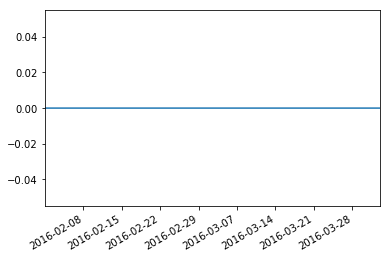

In [183]:
cardata = pd.Series(0,cartime)
#cardata
cardata.plot()

In [184]:
# Fill entries with regular 15Min time steps

start= cardata.index[0]
end= cardata.index[-1]
accurency = pd.Timedelta("2m30s")

newindex = []
values = []
dt = pd.Timedelta("15m")

t = start
i = 0
while end-t > pd.Timedelta("0m"):
    
    shift = cardata.index[i]-t
    
    # Lücke, Wagen ist weg
    if shift - accurency > pd.Timedelta("0m"):
        values.append(1)
        
    else:
        values.append(0)
        t = cardata.index[i]
        i = i + 1
        
    
    newindex.append(t) 
    #print(time)
    t = t + dt
    #print(i)




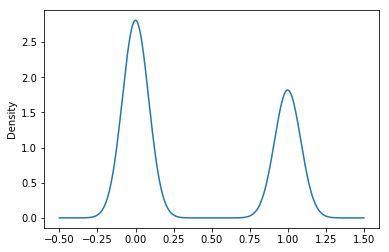

In [185]:
cardata2 = pd.Series(values,newindex)
cardata2.plot.kde()

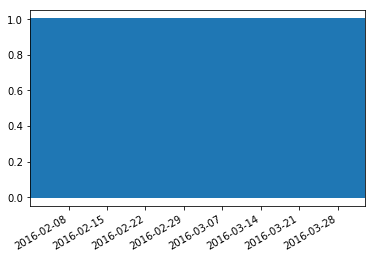

In [186]:
cardata2.plot.line()

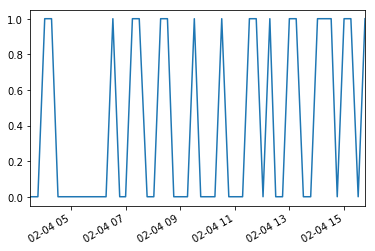

In [198]:

c3 = cardata2[300:350]
c3.plot()


In [175]:
#cardata2

In [173]:
#newindex